<font color = 'orange'>

# Naive Bayes Classification

</font>

- build a model that classifies mushrooms into edible or poisonous based on its features

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
import sklearn.metrics as metrics

In [2]:
# load dataset
mushrooms = pd.read_csv('data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# retrieve shape of dataset
mushrooms.shape

(8124, 23)

In [4]:
# check for null values
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# check for duplicates
mushrooms.duplicated().sum()

0

In [6]:
# check for datatypes
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
# retrieve descriptive stats
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


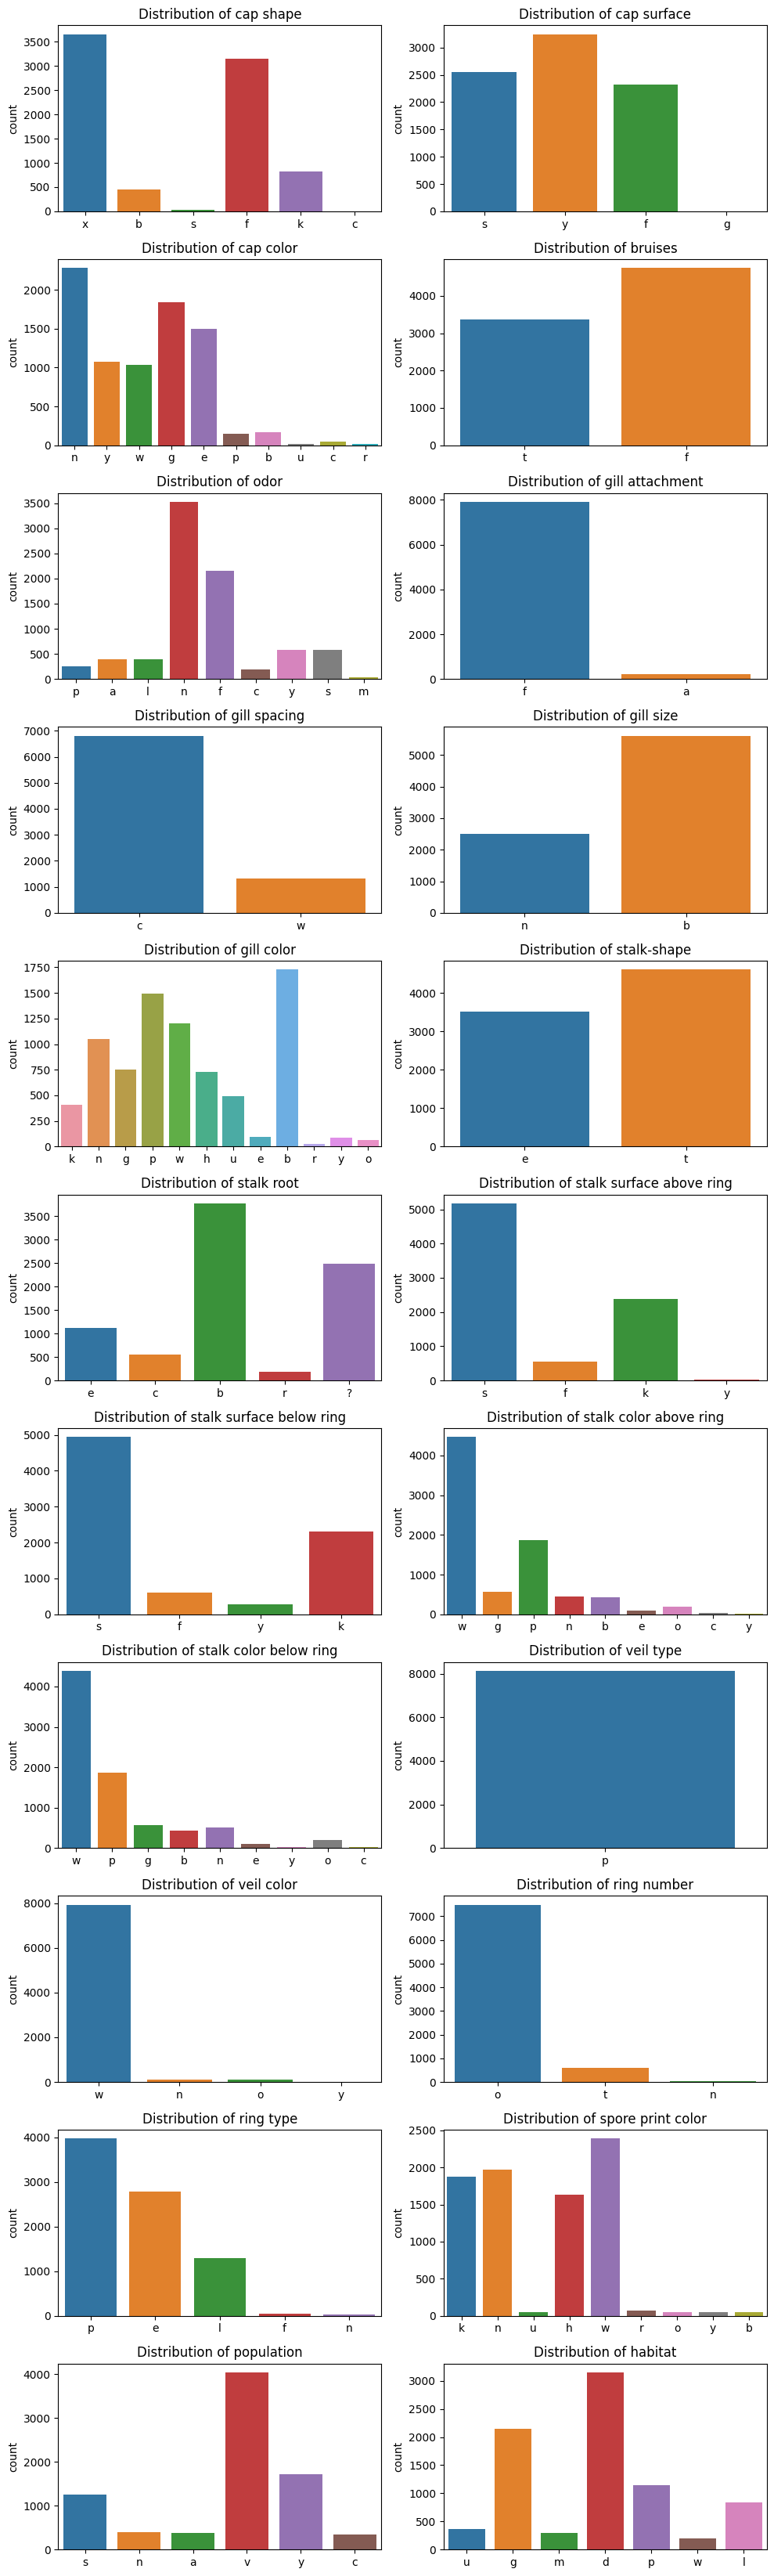

In [8]:
# plot count plots to visualise the distribution of each feature
fig, axes = plt.subplots(11, 2, figsize=(10, 33))

sns.countplot(x='cap-shape', data=mushrooms, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of cap shape")
axes[0, 0].set_xlabel("")

sns.countplot(x='cap-surface', data=mushrooms, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of cap surface")
axes[0, 1].set_xlabel("")

sns.countplot(x='cap-color', data=mushrooms, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of cap color")
axes[1, 0].set_xlabel("")

sns.countplot(x='bruises', data=mushrooms, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of bruises")
axes[1, 1].set_xlabel("")

sns.countplot(x='odor', data=mushrooms, ax=axes[2, 0])
axes[2, 0].set_title("Distribution of odor")
axes[2, 0].set_xlabel("")

sns.countplot(x='gill-attachment', data=mushrooms, ax=axes[2, 1])
axes[2, 1].set_title("Distribution of gill attachment")
axes[2, 1].set_xlabel("")

sns.countplot(x='gill-spacing', data=mushrooms, ax=axes[3, 0])
axes[3, 0].set_title("Distribution of gill spacing")
axes[3, 0].set_xlabel("")

sns.countplot(x='gill-size', data=mushrooms, ax=axes[3, 1])
axes[3, 1].set_title("Distribution of gill size")
axes[3, 1].set_xlabel("")

sns.countplot(x='gill-color', data=mushrooms, ax=axes[4, 0])
axes[4, 0].set_title("Distribution of gill color")
axes[4, 0].set_xlabel("")

sns.countplot(x='stalk-shape', data=mushrooms, ax=axes[4, 1])
axes[4, 1].set_title("Distribution of stalk-shape")
axes[4, 1].set_xlabel("")

sns.countplot(x='stalk-root', data=mushrooms, ax=axes[5, 0])
axes[5, 0].set_title("Distribution of stalk root")
axes[5, 0].set_xlabel("")

sns.countplot(x='stalk-surface-above-ring', data=mushrooms, ax=axes[5, 1])
axes[5, 1].set_title("Distribution of stalk surface above ring")
axes[5, 1].set_xlabel("")

sns.countplot(x='stalk-surface-below-ring', data=mushrooms, ax=axes[6, 0])
axes[6, 0].set_title("Distribution of stalk surface below ring")
axes[6, 0].set_xlabel("")

sns.countplot(x='stalk-color-above-ring', data=mushrooms, ax=axes[6, 1])
axes[6, 1].set_title("Distribution of stalk color above ring")
axes[6, 1].set_xlabel("")

sns.countplot(x='stalk-color-below-ring', data=mushrooms, ax=axes[7, 0])
axes[7, 0].set_title("Distribution of stalk color below ring")
axes[7, 0].set_xlabel("")

sns.countplot(x='veil-type', data=mushrooms, ax=axes[7, 1])
axes[7, 1].set_title("Distribution of veil type")
axes[7, 1].set_xlabel("")

sns.countplot(x='veil-color', data=mushrooms, ax=axes[8, 0])
axes[8, 0].set_title("Distribution of veil color")
axes[8, 0].set_xlabel("")

sns.countplot(x='ring-number', data=mushrooms, ax=axes[8, 1])
axes[8, 1].set_title("Distribution of ring number")
axes[8, 1].set_xlabel("")

sns.countplot(x='ring-type', data=mushrooms, ax=axes[9, 0])
axes[9, 0].set_title("Distribution of ring type")
axes[9, 0].set_xlabel("")

sns.countplot(x='spore-print-color', data=mushrooms, ax=axes[9, 1])
axes[9, 1].set_title("Distribution of spore print color")
axes[9, 1].set_xlabel("")

sns.countplot(x='population', data=mushrooms, ax=axes[10, 0])
axes[10, 0].set_title("Distribution of population")
axes[10, 0].set_xlabel("")

sns.countplot(x='habitat', data=mushrooms, ax=axes[10, 1])
axes[10, 1].set_title("Distribution of habitat")
axes[10, 1].set_xlabel("")


plt.tight_layout()
plt.show()


- remove veil type as there is only 1 unique value

In [9]:
# remove veil type feature
mushrooms = mushrooms.drop(columns = 'veil-type').reset_index(drop=True)

<br><br>

## Feature engineering

In [10]:
# label encode all categorical columns and retrieve label mappings
label_mappings = {}
encoder = LabelEncoder()

for col in mushrooms.columns:
    encoder.fit(mushrooms[col])
    mushrooms[col] = encoder.transform(mushrooms[col])
    label_mappings[col] = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

for col, mapping in label_mappings.items():
    print(f"{col}: {mapping}")

mushrooms.head()

class: {0: 'e', 1: 'p'}
cap-shape: {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}
cap-surface: {0: 'f', 1: 'g', 2: 's', 3: 'y'}
cap-color: {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}
bruises: {0: 'f', 1: 't'}
odor: {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}
gill-attachment: {0: 'a', 1: 'f'}
gill-spacing: {0: 'c', 1: 'w'}
gill-size: {0: 'b', 1: 'n'}
gill-color: {0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}
stalk-shape: {0: 'e', 1: 't'}
stalk-root: {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'}
stalk-surface-above-ring: {0: 'f', 1: 'k', 2: 's', 3: 'y'}
stalk-surface-below-ring: {0: 'f', 1: 'k', 2: 's', 3: 'y'}
stalk-color-above-ring: {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
stalk-color-below-ring: {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
veil-color: {0: 'n', 1: 'o', 2: 'w', 3: 'y'}
ring-number: {0: 'n', 1: 'o',

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


- to note that poisonous=1 and edible=0

<br><br>

## Train test split dataset, check for class balance and resample if needed

In [11]:
# perform train test split
train, test = train_test_split(mushrooms, train_size=0.75, random_state=42)

In [21]:
# check for class balance in target variable
train['class'].value_counts(normalize=True)

class
0    0.519941
1    0.480059
Name: proportion, dtype: float64

- great class balance, no resampling is needed

<br><br>

## Fit categorical naive bayes model

In [13]:
# set target and feature variables
y_train = train['class']
x_train = train.drop(columns='class')

y_test = test['class']
x_test = test.drop(columns='class')

In [14]:
# fit model
clf = CategoricalNB().fit(x_train, y_train)

<br><br>

## Evaluate model with confusion matrix, classification report and ROC curve

In [15]:
# initialise predictions and probability predictions
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

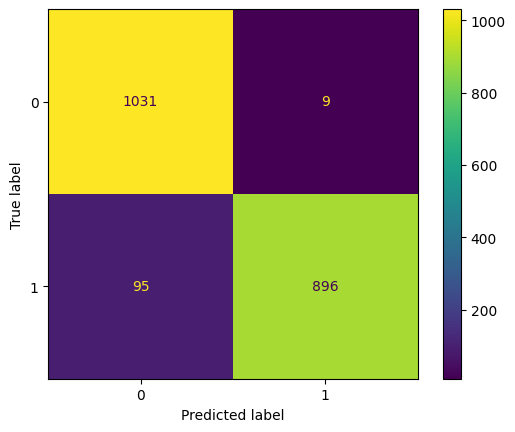

In [16]:
# plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

- confusion matrix shows decent results and accurate predictions visually

In [17]:
# retrieve classification report
target_names = list(map(str, clf.classes_))

report = metrics.classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1040
           1       0.99      0.90      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



- the model has a excellent performance, with an accuracy of 95%
- 92% of mushrooms predicted as edible are actually edible
- 90% of poisonous mushrooms are correctly classified

In [18]:
# retrieve model log loss
log_loss = metrics.log_loss(y_test, y_proba)
print("log loss: ", log_loss)

log loss:  0.1405626294887481


- with log loss of 0.14, the model's probability estimates are very accurate

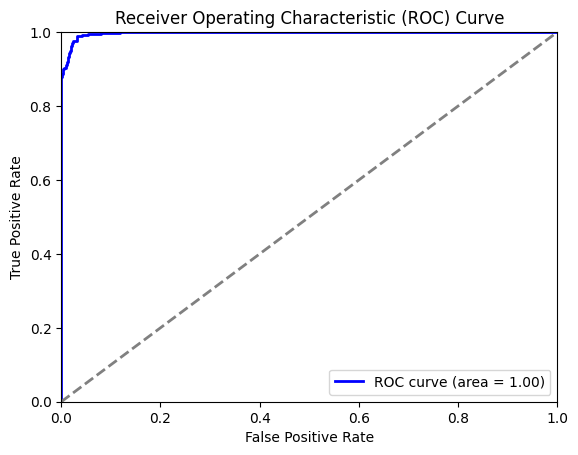

AUC: 0.9974976713498409


In [19]:
# plot the ROC curve and retrieve AUC
y_prob_positive_class = y_proba[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_positive_class)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()
print("AUC:", roc_auc)

- AUC of 0.997 is near perfect and indicates that the model is excellent in distinguishing edible and poisonous mushrooms
- AUC is very close to 1, suggesting that the model is very effective at predicting the probability of mushrooms being edible relative to poisonous

<br><br>

<font color = 'orange'>

## Summary

</font>

- fitted a categorical naive bayes model to classify mushrooms into edible and poisonous based on their features
- model is highly accurate, with high precision, recall and f1-scores for both classes
    - this is further supported by the model's log loss of 0.14 and AUC of 0.997
- even though the model is strong and robust, we should not trust it completely and should always take further precautions by consult professionals and never consuming wild mushrooms when in doubt
    - 8% of mushrooms classified as edible are actually poisonous
    - 10% of poisonous mushrooms are incorrectly classified as edible
    - model is not applicable to all mushrooms as it is only trained on 23 species of gilled mushrooms in the Agaricus and Lepiota family (pp.500-525)

<br><br><br><br>

# Metadata

- `class`  |  edible=e, poisonous=p

- `cap-shape`  |  bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- `cap-surface`  |  fibrous=f, grooves=g, scaly=y, smooth=s
- `cap-color`  |  brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

- `bruises`  |  bruises=t, no=f
- `odor`  |  almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

- `gill-attachment`  |  attached=a, descending=d, free=f, notched=n
- `gill-spacing`  |  close=c, crowded=w, distant=d
- `gill-size`  |  broad=b, narrow=n
- `gill-color`  |  black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

- `stalk-shape`  |  enlarging=e, tapering=t
- `stalk-root`  |  bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- `stalk-surface-above-ring`  |  fibrous=f, scaly=y, silky=k, smooth=s
- `stalk-surface-below-ring`  |  fibrous=f, scaly=y, silky=k, smooth=s
- `stalk-color-above-ring`  |  brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- `stalk-color-below-ring`  |  brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- `veil-type`  |  partial=p, universal=u
- `veil-color`  |  brown=n, orange=o, white=w, yellow=y

- `ring-number`  |  none=n, one=o, two=t
- `ring-type`  |  cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

- `spore-print-color`  |  black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

- `population`  |  abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- `habitat`  |  grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

# Acknowledgements
- data courtesy of National Audubon Society, provided via [Mushroom](https://archive.ics.uci.edu/dataset/73/mushroom) on UCI Machine Learning repository